In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import geopy.distance as gd
from IPython.display import display, HTML

In [4]:
#pip install geopy

## Import and Load Data

In [6]:
permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits_view_-4632427886711569466.csv')
#permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits_view_-4632427886711569466.csv',parse_dates = ['Date Entered','Date Issued','Expiration Date'])
permits.head(3)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,Parcel,x,y
0,201511887,Short Term Rental - Non-Owner Occupied,4/1/2015 5:00:00 AM,7/9/2015 5:00:00 AM,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.834922,36.209292,1,37218,06904012500,-9.666419e+06,4.329458e+06
1,201512342,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,1004 MANSFIELD ST,NASHVILLE,TN,S SIDE MANSFIELD ST E OF MCFERRIN AVE IN OLWIL...,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.752833,36.181426,2,37206,08208040200,-9.657281e+06,4.325614e+06
2,201512346,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,1027 DELMAS AVE,NASHVILLE,TN,PT LOT 3 EASTHILL SUB,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.741508,36.199439,3,37216,07210009800,-9.656020e+06,4.328099e+06


In [10]:
listings = pd.read_csv('../data/listings.csv',parse_dates = ['host_since'])
listings.head(5)
#HTML(listings.to_html(render_links = True,escape=False))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20241221051945,2024-12-21,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,3.52
1,39870,https://www.airbnb.com/rooms/39870,20241221051945,2024-12-21,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.97,4.93,4.92,NaN,f,1,0,1,0,5.19
2,59576,https://www.airbnb.com/rooms/59576,20241221051945,2024-12-21,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,5.00,NaN,f,7,2,5,0,0.10
3,72906,https://www.airbnb.com/rooms/72906,20241221051945,2024-12-21,city scrape,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire private top floor of my home with share...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/1777db4f-d0a6...,176117,...,4.99,4.97,4.90,NaN,f,1,1,0,0,4.54
4,258817,https://www.airbnb.com/rooms/258817,20241221051945,2024-12-21,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.91,4.74,4.73,NaN,f,8,0,7,1,0.61


In [12]:
reviews  = pd.read_csv('../data/reviews.csv',parse_dates = ['date'])
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


## Rental permits Data Analysis

In [14]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    15484 non-null  object 
 1   Permit Subtype Description  15484 non-null  object 
 2   Date Entered                15484 non-null  object 
 3   Date Issued                 14173 non-null  object 
 4   Address                     15484 non-null  object 
 5   City                        15483 non-null  object 
 6   State                       15483 non-null  object 
 7   Subdivision Lot             15483 non-null  object 
 8   Permit Type                 15484 non-null  object 
 9   Permit SubType              15484 non-null  object 
 10  Purpose                     15383 non-null  object 
 11  Council District            15484 non-null  int64  
 12  Census Tract                15484 non-null  int64  
 13  Expiration Date             154

In [15]:
permits.value_counts("Permit Subtype Description")

Permit Subtype Description
Short Term Rental – Multifamily           7929
Short Term Rental - Owner Occupied        5794
Short Term Rental - Non-Owner Occupied    1761
Name: count, dtype: int64

In [16]:
permits.describe()

,Council District,Census Tract,Applicant Home Phone #,Applicant Mobile Phone #,Applicant Work Phone #,Applicant Work Phone Ext,Contact Home Phone #,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,x,y
count,15484.000000,1.548400e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15484.000000,15484.000000,15484.000000,15484.000000,1.548400e+04,1.548400e+04
mean,14.850297,3.691031e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.773836,36.162228,8176.860953,37201.219065,-9.659619e+06,4.322968e+06
std,7.166049,1.970448e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047805,0.036920,4763.791658,300.029465,5.321621e+03,5.090731e+03
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.040658,35.985097,1.000000,0.000000,-9.689322e+06,4.298571e+06
25%,6.000000,3.701270e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.800232,36.143866,3952.750000,37203.000000,-9.662558e+06,4.320435e+06
50%,17.000000,3.701620e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.780346,36.159386,8345.500000,37207.000000,-9.660344e+06,4.322575e+06
75%,19.000000,3.701810e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.747714,36.182163,12345.250000,37211.000000,-9.656711e+06,4.325716e+06
max,35.000000,3.701960e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.543676,36.385262,16274.000000,37228.000000,-9.633998e+06,4.353763e+06


In [17]:
# sns.histplot(data = permits,x='Permit Subtype Description')
# plt.show()

In [24]:
#updating data type for date columns
permits['Date Entered'] = pd.to_datetime(permits['Date Entered'])
permits['Date Issued'] = pd.to_datetime(permits['Date Issued'])
permits['Expiration Date']= pd.to_datetime(permits['Expiration Date'])

C:\Users\Praveena\AppData\Local\Temp\ipykernel_17624\4153246249.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  permits['Expiration Date']= pd.to_datetime(permits['Expiration Date'])


In [27]:
permits.dtypes

Permit #                              object
Permit Subtype Description            object
Date Entered                  datetime64[ns]
Date Issued                   datetime64[ns]
Address                               object
City                                  object
State                                 object
Subdivision Lot                       object
Permit Type                           object
Permit SubType                        object
Purpose                               object
Council District                       int64
Census Tract                           int64
Expiration Date               datetime64[ns]
Permit Owner Name                     object
Permit Owner Address 1                object
Permit Owner Address 2                object
Permit Owner Address 3                object
Permit Owner City                     object
Permit Owner State                    object
Permit Owner Zip Code                 object
Permit Status                         object
Applicant 

In [29]:
permits[['date applied','issued time']]= permits['Date Entered'].astype(str).str.split(' ',expand=True)
permits[['date approved','approved time']] = permits['Date Issued'].astype(str).str.split(' ',expand=True)
permits['date expired'] = permits['Expiration Date'].dt.date
#permits['date expired'] = permits['Expiration Date'].astype(str).str.split(' ',expand = True)
#9/6/2025 0:00
permits.head(1)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,ObjectId,Zip Code,Parcel,x,y,date applied,issued time,date approved,approved time,date expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,1,37218,06904012500,-9666419.309,4.329458e+06,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08


In [31]:
# permits_split_exp = permits['Expiration Date'].astype(str).str.split(' ',expand = True)
# permits_split_exp


In [33]:
permits['date expired']= pd.to_datetime(permits['date expired'])

In [35]:
permits.dtypes

Permit #                              object
Permit Subtype Description            object
Date Entered                  datetime64[ns]
Date Issued                   datetime64[ns]
Address                               object
City                                  object
State                                 object
Subdivision Lot                       object
Permit Type                           object
Permit SubType                        object
Purpose                               object
Council District                       int64
Census Tract                           int64
Expiration Date               datetime64[ns]
Permit Owner Name                     object
Permit Owner Address 1                object
Permit Owner Address 2                object
Permit Owner Address 3                object
Permit Owner City                     object
Permit Owner State                    object
Permit Owner Zip Code                 object
Permit Status                         object
Applicant 

In [38]:
permits['year applied'] = permits['Date Entered'].astype(str).str.extract(r'(\d{4})', expand=False)
permits['year issued'] = permits['Date Issued'].astype(str).str.extract(r'(\d{4})', expand = False)
permits['year expired']=permits['Expiration Date'].dt.year
#permits['year expired'] = permits['date expired'].astype(str).str.extract('r(\d{4})', expand = False)
#2023-08-08
permits.head(2)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,x,y,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,-9.666419e+06,4.329458e+06,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08,2015,2015,2023.0
1,201512342,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-06 05:00:00,1004 MANSFIELD ST,NASHVILLE,TN,S SIDE MANSFIELD ST E OF MCFERRIN AVE IN OLWIL...,CASR,CAZ10A002,...,-9.657281e+06,4.325614e+06,2015-04-06,05:00:00,2015-04-06,05:00:00,2020-04-06,2015,2015,2020.0


In [40]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Permit #                    15484 non-null  object        
 1   Permit Subtype Description  15484 non-null  object        
 2   Date Entered                15484 non-null  datetime64[ns]
 3   Date Issued                 14173 non-null  datetime64[ns]
 4   Address                     15484 non-null  object        
 5   City                        15483 non-null  object        
 6   State                       15483 non-null  object        
 7   Subdivision Lot             15483 non-null  object        
 8   Permit Type                 15484 non-null  object        
 9   Permit SubType              15484 non-null  object        
 10  Purpose                     15383 non-null  object        
 11  Council District            15484 non-null  int64     

In [43]:
permits['date applied'].min()


'2015-04-01'

In [45]:
permits['date applied'].max()

'2025-01-17'

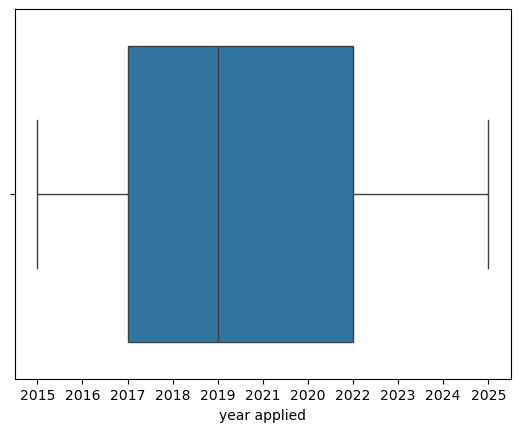

In [47]:
sns.boxplot(data=permits,x="year applied")
plt.show()

min = 2015,
max = 2025,  
q1 = 2017,  
q3 = 2022, 
median = 2019

In [52]:
#1.a.total applications applied for rental permit  in nashville
total_applications_received_by_year = permits.groupby('year applied')['Permit #'].count().sort_values(ascending=False).reset_index(name='count')
total_applications_received_by_year

,year applied,count
0,2019,2093
1,2018,2050
2,2022,1928
3,2017,1719
4,2016,1612
5,2021,1490
6,2015,1358
7,2024,1174
8,2023,1055
9,2020,948


In [54]:
#1.b.total applications applied for rental permit by city  per year
total_applications_received_by_year = permits.groupby(['City','year applied'])['Permit #'].count().sort_values(ascending=False).reset_index(name='count')
total_applications_received_by_year

,City,year applied,count
0,NASHVILLE,2019,2011
1,NASHVILLE,2018,1971
2,NASHVILLE,2022,1858
3,NASHVILLE,2017,1642
4,NASHVILLE,2016,1544
...,...,...,...
95,MOUNT JULIET,2023,1
96,MOUNT JULIET,2017,1
97,JOELTON,2017,1
98,JOELTON,2018,1


In [56]:
# 2.a. total type of applications overall nashville
Type_of_permits_overall = permits.groupby('Permit Subtype Description')['Permit #'].count().reset_index(name = 'total count')
Type_of_permits_overall

,Permit Subtype Description,total count
0,Short Term Rental - Non-Owner Occupied,1761
1,Short Term Rental - Owner Occupied,5794
2,Short Term Rental – Multifamily,7929


In [58]:
# 2.a. total type of applications overall nashville year wise
Type_of_permits_overall_year = permits.groupby(['year applied','Permit Subtype Description'])['Permit #'].count().reset_index(name = 'total count')
Type_of_permits_overall_year

,year applied,Permit Subtype Description,total count
0,2015,Short Term Rental - Non-Owner Occupied,669
1,2015,Short Term Rental - Owner Occupied,458
2,2015,Short Term Rental – Multifamily,231
3,2016,Short Term Rental - Non-Owner Occupied,621
4,2016,Short Term Rental - Owner Occupied,614
5,2016,Short Term Rental – Multifamily,377
6,2017,Short Term Rental - Non-Owner Occupied,253
7,2017,Short Term Rental - Owner Occupied,801
8,2017,Short Term Rental – Multifamily,665
9,2018,Short Term Rental - Non-Owner Occupied,127


In [60]:
# 2.b. total type of applications by city 
Type_of_permits_by_city = permits.groupby(['year applied','City','Permit Subtype Description'])['Permit #'].count().sort_values(ascending = False).reset_index(name = 'total count')
Type_of_permits_by_city

,year applied,City,Permit Subtype Description,total count
0,2022,NASHVILLE,Short Term Rental – Multifamily,1373
1,2019,NASHVILLE,Short Term Rental – Multifamily,1145
2,2021,NASHVILLE,Short Term Rental – Multifamily,1098
3,2018,NASHVILLE,Short Term Rental - Owner Occupied,955
4,2018,NASHVILLE,Short Term Rental – Multifamily,890
...,...,...,...,...
165,2022,GOODLETTSVILLE,Short Term Rental - Owner Occupied,1
166,2016,HERMITAGE,Short Term Rental – Multifamily,1
167,2022,MADISON,Short Term Rental - Non-Owner Occupied,1
168,2016,GOODLETTSVILLE,Short Term Rental - Owner Occupied,1


In [63]:
#3.total count of applications by city wise
total_applications_received_by_city = permits.groupby('City')['Permit #'].count().sort_values(ascending=False).reset_index()
total_applications_received_by_city

,City,Permit #
0,NASHVILLE,14864
1,MADISON,208
2,ANTIOCH,104
3,HERMITAGE,95
4,OLD HICKORY,86
5,WHITES CREEK,37
6,GOODLETTSVILLE,35
7,BRENTWOOD,25
8,JOELTON,14
9,PEGRAM,8


In [65]:
total_applications_received_by_city['Permit #'].mean()

1032.2

In [67]:
#status of application overall nashville
status_of_applications = permits.groupby('Permit Status')['Permit #'].count().sort_values(ascending=False).reset_index()
status_of_applications

,Permit Status,Permit #
0,ISSUED,7014
1,EXPIRED,6575
2,CANCELLED,1721
3,REVOKED,77
4,EXPIREEXT,48
5,PENDING,36
6,HOLD,9
7,REFUNDED,3
8,VOID,1


In [69]:
status_of_applications = permits.groupby(['year applied','Permit Status','Permit Subtype Description'])['Permit #'].count().sort_values(ascending=False).reset_index()
status_of_applications

,year applied,Permit Status,Permit Subtype Description,Permit #
0,2022,ISSUED,Short Term Rental – Multifamily,1108
1,2021,ISSUED,Short Term Rental – Multifamily,833
2,2024,ISSUED,Short Term Rental – Multifamily,762
3,2018,EXPIRED,Short Term Rental - Owner Occupied,630
4,2019,EXPIRED,Short Term Rental – Multifamily,574
...,...,...,...,...
122,2020,REFUNDED,Short Term Rental – Multifamily,1
123,2018,HOLD,Short Term Rental - Owner Occupied,1
124,2022,EXPIRED,Short Term Rental - Non-Owner Occupied,1
125,2019,REVOKED,Short Term Rental - Non-Owner Occupied,1


In [71]:
by_end_of_2025 = permits[(permits["year expired"] == 2025.0)  & (permits["Permit Status"] == 'EXPIRED')]
by_end_of_2025

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,x,y,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
3109,2016064179,Short Term Rental - Non-Owner Occupied,2016-11-17 06:00:00,2016-12-07 06:00:00,908 SANDBURG CT,NASHVILLE,TN,LOT 94 REELFOOT SEC 2,CASR,CAZ10A002,...,-9.643638e+06,4.319700e+06,2016-11-17,06:00:00,2016-12-07,06:00:00,2025-01-06,2016,2016,2025.0
3214,2016068330,Short Term Rental - Non-Owner Occupied,2016-12-07 06:00:00,2016-12-19 06:00:00,733 GREYMONT DR,NASHVILLE,TN,LOT 114 SEC 2 GLENCLIFF ESTATES,CASR,CAZ10A002,...,-9.652496e+06,4.317026e+06,2016-12-07,06:00:00,2016-12-19,06:00:00,2025-01-18,2016,2016,2025.0
5473,2017074514,Short Term Rental - Owner Occupied,2017-11-20 06:00:00,2017-12-04 06:00:00,1915 PINEHURST DR,NASHVILLE,TN,LOT 315 SEC 3 BURCHWOOD GARDENS,CASR,CAZ10A001,...,-9.653027e+06,4.328101e+06,2017-11-20,06:00:00,2017-12-04,06:00:00,2025-01-03,2017,2017,2025.0
5540,2017077549,Short Term Rental - Owner Occupied,2017-12-05 06:00:00,2017-12-18 06:00:00,1412 A LILLIAN ST,NASHVILLE,TN,UNIT A HOMES AT 1412 LILLIAN STREET,CASR,CAZ10A001,...,-9.656451e+06,4.324378e+06,2017-12-05,06:00:00,2017-12-18,06:00:00,2025-01-17,2017,2017,2025.0
6430,2018071420,Short Term Rental - Owner Occupied,2018-11-13 06:00:00,2018-12-12 06:00:00,836 GLEN AVE,NASHVILLE,TN,PT LOT 73 WAVERLY PLACE,CASR,CAZ10A001,...,-9.660439e+06,4.318399e+06,2018-11-13,06:00:00,2018-12-12,06:00:00,2025-01-11,2018,2018,2025.0
6717,2018072918,Short Term Rental - Owner Occupied,2018-11-19 06:00:00,2018-12-04 06:00:00,3307 ELKINS AVE,NASHVILLE,TN,LOT 120 HORTENSE PLACE,CASR,CAZ10A001,...,-9.665275e+06,4.321349e+06,2018-11-19,06:00:00,2018-12-04,06:00:00,2025-01-03,2018,2018,2025.0
7489,2020073660,Short Term Rental - Owner Occupied,2020-11-24 06:00:00,2020-12-18 06:00:00,435 KINSEY BLVD,MADISON,TN,EAST SIDE KINSEY BOULEVARD NORTH OF WARD ROAD,CASR,CAZ10A001,...,-9.650234e+06,4.335978e+06,2020-11-24,06:00:00,2020-12-18,06:00:00,2025-01-17,2020,2020,2025.0
7498,2020075036,Short Term Rental - Owner Occupied,2020-12-02 06:00:00,2020-12-18 06:00:00,920 B N 5TH ST,NASHVILLE,TN,LOT 19 SHARPE & CRUTCHER ADDN,CASR,CAZ10A001,...,-9.658463e+06,4.326489e+06,2020-12-02,06:00:00,2020-12-18,06:00:00,2025-01-17,2020,2020,2025.0
7526,2020078720,Short Term Rental – Multifamily,2020-12-17 06:00:00,2021-01-08 06:00:00,920 SOUTH ST 323,NASHVILLE,TN,UNIT 323 ILLUME CONDOMINIUM,CASR,CAZ10A003,...,-9.660475e+06,4.320928e+06,2020-12-17,06:00:00,2021-01-08,06:00:00,2025-01-08,2020,2021,2025.0
8083,2019078169,Short Term Rental – Multifamily,2019-12-23 06:00:00,2020-01-17 06:00:00,105 DUKE ST 1,NASHVILLE,TN,UNIT 1 105-107 DUKE STREET,CASR,CAZ10A003,...,-9.658805e+06,4.329220e+06,2019-12-23,06:00:00,2020-01-17,06:00:00,2025-01-17,2019,2020,2025.0


## Airbnb Data 

In [74]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            9406 non-null   int64         
 1   listing_url                                   9406 non-null   object        
 2   scrape_id                                     9406 non-null   int64         
 3   last_scraped                                  9406 non-null   object        
 4   source                                        9406 non-null   object        
 5   name                                          9406 non-null   object        
 6   description                                   9188 non-null   object        
 7   neighborhood_overview                         6201 non-null   object        
 8   picture_url                                   9406 non-null   object

In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740601 entries, 0 to 740600
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     740601 non-null  int64         
 1   id             740601 non-null  int64         
 2   date           740601 non-null  datetime64[ns]
 3   reviewer_id    740601 non-null  int64         
 4   reviewer_name  740600 non-null  object        
 5   comments       740327 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 33.9+ MB


In [78]:
#Create Rental Listing Distance From Airport and Nashville City Center
downtown_nashville = (36.165890, -86.784440)  
airport_nashville = (36.131687, -86.668823)
listings["downtown_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), downtown_nashville).miles, axis=1)
listings["airport_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), airport_nashville).miles, axis=1)
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,downtown_distance,airport_distance
0,6422,https://www.airbnb.com/rooms/6422,20241221051945,2024-12-21,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.98,NaN,f,1,0,1,0,3.52,2.751481,4.636106
1,39870,https://www.airbnb.com/rooms/39870,20241221051945,2024-12-21,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.92,NaN,f,1,0,1,0,5.19,3.252224,8.061674
2,59576,https://www.airbnb.com/rooms/59576,20241221051945,2024-12-21,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,NaN,f,7,2,5,0,0.10,10.899691,5.870829
3,72906,https://www.airbnb.com/rooms/72906,20241221051945,2024-12-21,city scrape,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire private top floor of my home with share...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/1777db4f-d0a6...,176117,...,4.90,NaN,f,1,1,0,0,4.54,2.556736,7.373976
4,258817,https://www.airbnb.com/rooms/258817,20241221051945,2024-12-21,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.73,NaN,f,8,0,7,1,0.61,10.792390,4.765550


In [81]:
# #split the date column into year and month
# nashville_airbnb['year'] = nashville_airbnb['date'].str.split('-', expand = True)[0]
# nashville_airbnb['month'] = nashville_airbnb['date'].str.split('-', expand = True)[1].astype(int)
# # Create 'season' Column from 'month' column and Transform 'month' Column
# season_map = {1: 'Winter', 2: 'Winter', 3 : 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
# nashville_airbnb['season'] = nashville_airbnb['month'].map(season_map) 
# month_map = {1: 'January', 2: 'February', 3 : 'March',4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# nashville_airbnb['month'] = nashville_airbnb['month'].map(month_map)
# nashville_airbnb

In [82]:
# Number of Available Listings in the Nashville Airbnb Ecosystem
print(f"There are {listings.id.nunique()} unique Airbnb rental listings in Nashville, TN")

There are 9406 unique Airbnb rental listings in Nashville, TN


In [86]:
listings['price']= listings['price'].astype(str)
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True)

#listings['price'] = pd.to_numeric(listings['price'], errors='coerce').fillna(0)

In [88]:
listings['price'] = pd.to_numeric(listings['price'], errors='coerce').fillna(0)
listings['price'] = listings['price'].astype(int)

In [90]:
# Average and Median Rental Listing Price Per Night in the  Nashville Airbnb Ecosystem
avg = listings.price.mean()
med = listings.price.median()
low = listings[listings['price']!=0.0]['price'].min()
high = listings.price.max()
print(f"In Nashville, TN, nightly Airbnb rental prices could be as low as ${round(low)} and as high as ${round(high)}. the average nightly price of an Airbnb rental listing is ${round(avg)},  its median is around ${round(med)}")

In Nashville, TN, nightly Airbnb rental prices could be as low as $10 and as high as $9999. the average nightly price of an Airbnb rental listing is $128,  its median is around $93


In [92]:
# empty price column
price_with_0 = len(listings[listings['price'] ==0])
price_with_0

2864

In [94]:
#price categories
below_100 = (len(listings[listings.price < 100]) / len(listings.price))*100
below_150 = (len(listings[listings.price < 150])/len(listings.price))*100
below_200 = (len(listings[listings.price < 200])/len(listings.price))*100
below_1000 = (len(listings[listings.price < 1000])/len(listings.price))*100
price_ranges = {'Under $100': round(below_100), 'Under $150': round(below_150), 'Under $200': round(below_200), 'Under $1000': round(below_1000)}
price_ranges

{'Under $100': 53, 'Under $150': 71, 'Under $200': 83, 'Under $1000': 99}

Text(0.5, 1.0, 'Price Range Breakdown of Airbnb Listings in Nashville')

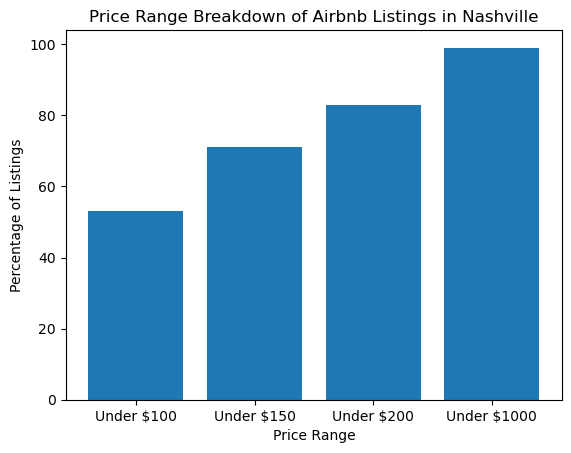

In [96]:
# price range breakdown of airbnb listings in nashville
plt.bar((price_ranges.keys()), list(price_ranges.values()), align='center')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Listings')
plt.title("Price Range Breakdown of Airbnb Listings in Nashville")

In [98]:
neighbourhood_price = listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
neighbourhood_price

neighbourhood_cleansed
District 34    561.333333
District 20    418.718367
District 23    268.958333
District 11    233.920000
District 25    201.152542
District 17    188.031481
District 35    175.636364
District 3     156.705128
District 18    154.353414
District 10    152.131579
District 4     149.241379
District 32    141.875000
District 2     138.771186
District 14    138.277778
District 24    132.800000
District 30    131.790698
District 5     129.117146
District 33    126.423077
District 22    122.000000
District 28    118.230769
District 27    116.220000
District 13    113.598131
District 29    108.369231
District 7     107.925094
District 21    107.701493
District 12    106.169811
District 8     104.414141
District 1     102.297297
District 26    101.805970
District 19     97.915367
District 6      95.470874
District 9      93.564516
District 15     84.605634
District 31     82.709677
District 16     59.163366
Name: price, dtype: float64

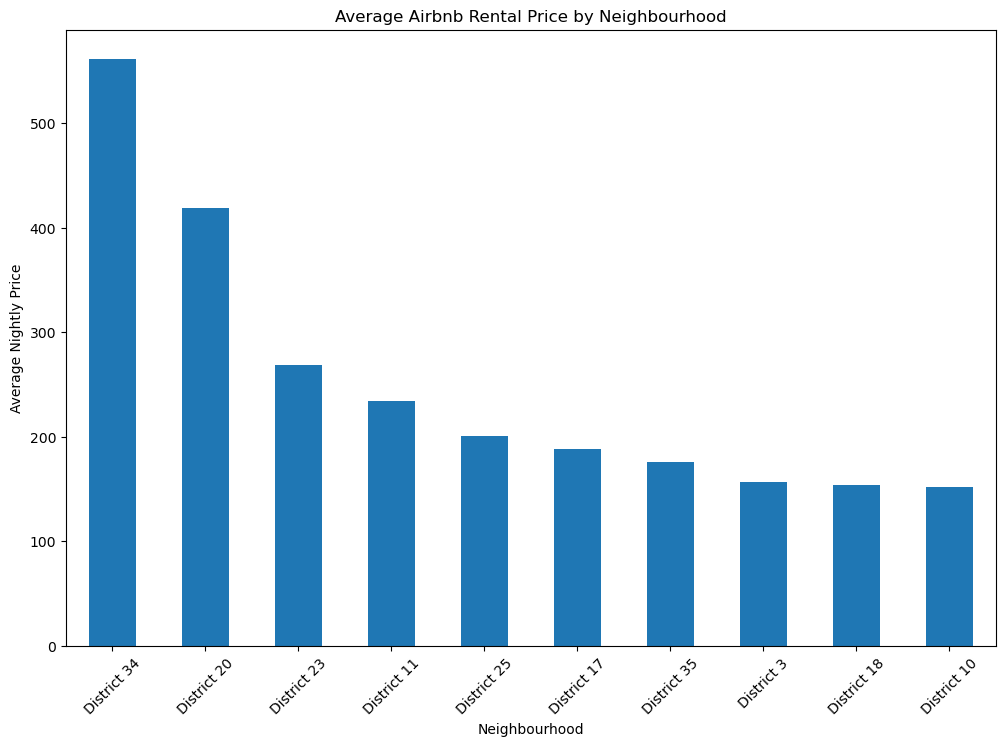

In [100]:
# average nashville nightly airbnb listings price by neighbourhood top -10
plt.figure(figsize=(12, 8))
neighbourhood_price = listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
neighbourhood_price.head(10).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Average Airbnb Rental Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Nightly Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()

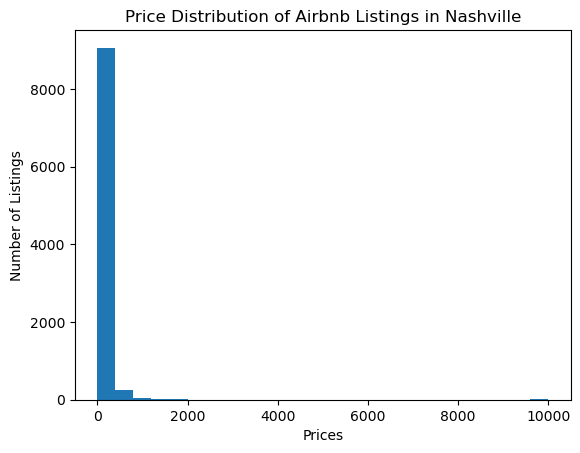

In [102]:
# price distribution of airbnb listings in nashville
plt.hist(data = listings, x = 'price', bins = 25)
plt.xlabel('Prices')
plt.ylabel('Number of Listings')
plt.title("Price Distribution of Airbnb Listings in Nashville");

In [104]:
listings.room_type.value_counts(normalize=True)

room_type
Entire home/apt    0.902615
Private room       0.086434
Hotel room         0.010632
Shared room        0.000319
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Airbnb Listing Types in Nashville, TN')

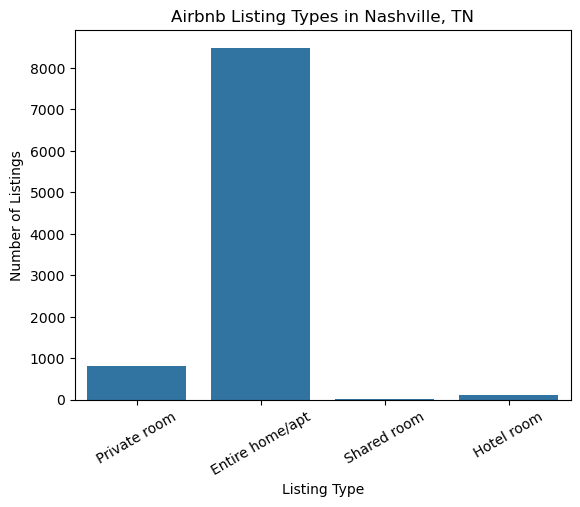

In [106]:
sns.countplot(data=listings,x='room_type')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Airbnb Listing Types in Nashville, TN")

In [108]:
listings['year'] = listings['host_since'].astype(str).str.extract(r'(\d{4})', expand=False)
listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,downtown_distance,airport_distance,year
0,6422,https://www.airbnb.com/rooms/6422,20241221051945,2024-12-21,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,NaN,f,1,0,1,0,3.52,2.751481,4.636106,2009
1,39870,https://www.airbnb.com/rooms/39870,20241221051945,2024-12-21,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,NaN,f,1,0,1,0,5.19,3.252224,8.061674,2010
2,59576,https://www.airbnb.com/rooms/59576,20241221051945,2024-12-21,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,NaN,f,7,2,5,0,0.10,10.899691,5.870829,2011


In [201]:
#number of nashville aibnb hosts by year
listings_since_by_year = listings.groupby('year')['host_id'].count().reset_index(name='total count')
listings_since_by_year

,year,total count
0,2009,13
1,2010,66
2,2011,140
3,2012,244
4,2013,490
5,2014,850
6,2015,877
7,2016,1483
8,2017,901
9,2018,634


Text(0.5, 1.0, 'Number of Nashville Aibnb Available Listings by Year')

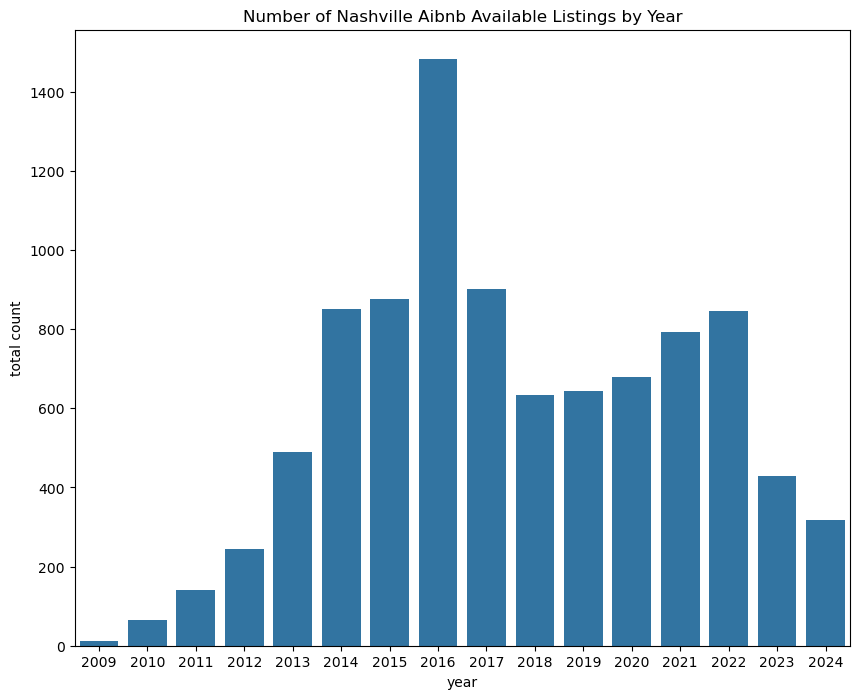

In [203]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='total count',data=listings_since_by_year)
plt.title("Number of Nashville Aibnb Available Listings by Year")

In [115]:
# distribution of rental listings availability over 365 days
one_three_months = len(listings[(listings.availability_365 >= 0) & (listings.availability_365 < 90)])
four_six_months = len(listings[(listings.availability_365 >= 90) & (listings.availability_365 < 180)])
seven_nine_months = len(listings[(listings.availability_365 >= 180) & (listings.availability_365 < 270)])
ten_twelve_months = len(listings[(listings.availability_365 >= 270) & (listings.availability_365 <= 365)])

availability = [one_three_months,four_six_months,seven_nine_months,ten_twelve_months]

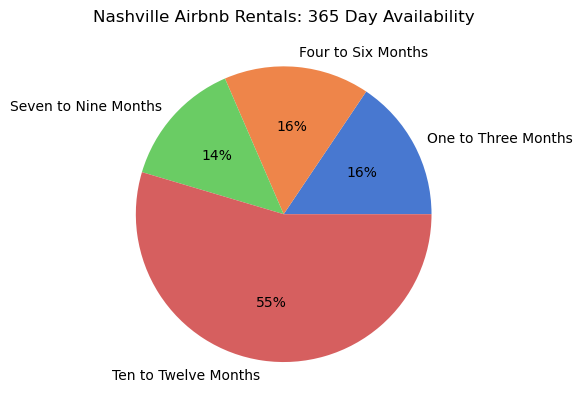

In [117]:
# 365-day Availability Visualization
color = sns.color_palette('muted') 
plt.pie(availability, labels=['One to Three Months','Four to Six Months','Seven to Nine Months','Ten to Twelve Months'], colors=color, autopct='%.0f%%')
plt.title('Nashville Airbnb Rentals: 365 Day Availability')
plt.show() 

In [119]:
#distance of listings from Nashville airport
avg = listings.airport_distance.mean()
round(avg)

7

In [121]:
below_avg = len(listings[listings.airport_distance < avg])
below_avg

5203

In [123]:
above_avg = len(listings[listings.airport_distance > avg])
above_avg

4203

In [125]:
total = below_avg+above_avg
total

9406

In [127]:
with_in_avg_distance = round((below_avg/total)*100,2)
with_in_avg_distance

55.32

In [129]:
away_distance = round((above_avg/total)*100,2)
away_distance

44.68

Text(0.5, 1.0, 'Distribution of Aibnb Listing Distance from the Nashville Airport')

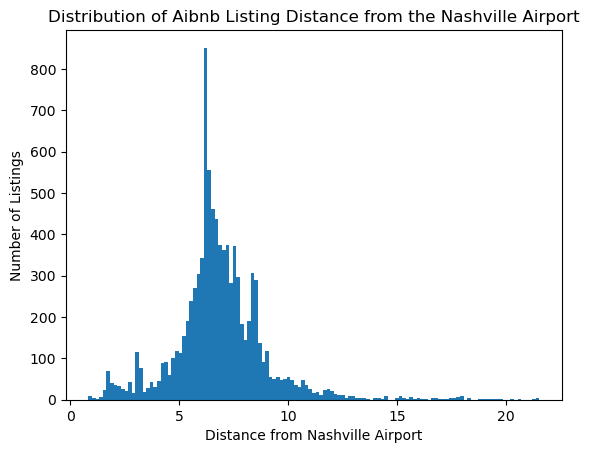

In [131]:
#distribution of listings from nashville airport
plt.hist(data = listings, x = 'airport_distance',bins = 125)
plt.xlabel("Distance from Nashville Airport")
plt.ylabel("Number of Listings")
plt.title("Distribution of Aibnb Listing Distance from the Nashville Airport")


In [153]:
# distance from Nashville Downtown
avg_distance_downtown = listings.downtown_distance.mean()
round(avg_distance_downtown)

3

In [170]:
below_avg_d = len(listings[listings.downtown_distance < avg])
above_avg_d = len(listings[listings.downtown_distance > avg])
total_d = below_avg_d+above_avg_d
total_d

9406

In [168]:
print(f'listings with in average distance {below_avg_d}  and listings above the average distance from downtown {above_avg_d}')

listings with in average distance 8552  and listings above the average distance from downtown 854


In [172]:
listings_below_average = round((below_avg_d/total_d)*100,2)
listings_above_average = round((above_avg_d/total_d)*100,2)

In [182]:
print(f' {listings_below_average} % of listings are with in {round(avg_distance_downtown)} mile radius of thr Nashville downtown and {listings_above_average} % of listings are located beyond {round(avg_distance_downtown)} miles of radius ')

 90.92 % of listings are with in 3 mile radius of thr Nashville downtown and 9.08 % of listings are located beyond 3 miles of radius 


Text(0.5, 1.0, 'Distribution of Aibnb Listing Distance from the Nashville Downtown')

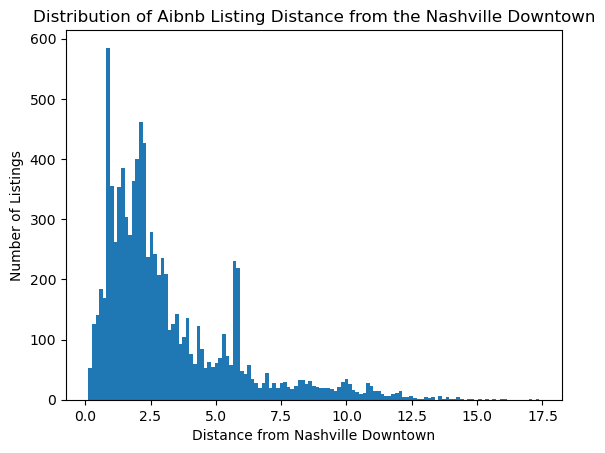

In [185]:
#distribution of listings from nashville downtown
plt.hist(data = listings, x = 'downtown_distance',bins = 125)
plt.xlabel("Distance from Nashville Downtown")
plt.ylabel("Number of Listings")
plt.title("Distribution of Aibnb Listing Distance from the Nashville Downtown")

In [195]:
mean_price = listings.groupby('year')['price'].mean()
median_price = listings.groupby('year')['price'].median()

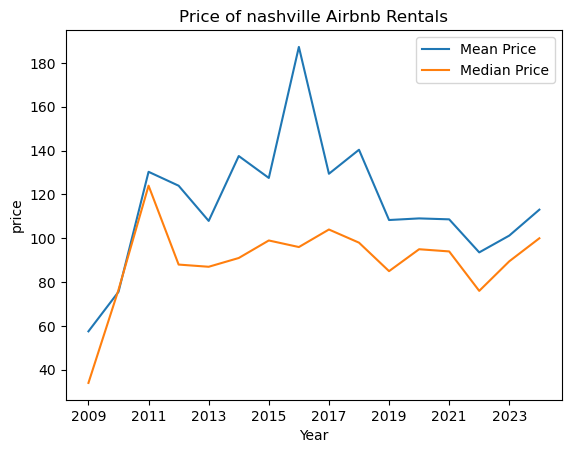

In [197]:
mean_price.plot()
median_price.plot()
plt.xlabel('Year')
plt.ylabel('price')
plt.title('Price of nashville Airbnb Rentals')
plt.legend(['Mean Price','Median Price'])
plt.show()

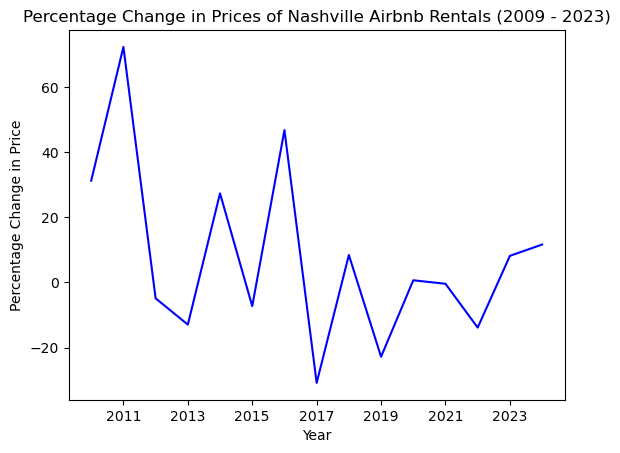

In [199]:
# Year-on-Year Price Change in the Average Listing Price of Nashville Airbnb Listings
price_change = mean_prices.pct_change() * 100
price_change.plot(color = 'blue')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Price')
plt.title("Percentage Change in Prices of Nashville Airbnb Rentals (2009 - 2023)");